In [ ]:
from google.colab import drive
drive.mount('/content/drive') #this works to conect the drive to the script itself being then able to acess files such as the data.zip

Mounted at /content/drive


Extração dos ficheiros zip

In [ ]:
!unzip /content/drive/MyDrive/TESE/RioFatSegm.zip

Archive:  /content/drive/MyDrive/TESE/RioFatSegm.zip
  inflating: RioFatSegm/2016Rodrigues.pdf  
   creating: RioFatSegm/Dicom _ Treino/
   creating: RioFatSegm/Dicom _ Treino/ACel/
  inflating: RioFatSegm/Dicom _ Treino/ACel/IM-0003-0001_an.dcm  
  inflating: RioFatSegm/Dicom _ Treino/ACel/IM-0003-0002_an.dcm  
  inflating: RioFatSegm/Dicom _ Treino/ACel/IM-0003-0003_an.dcm  
  inflating: RioFatSegm/Dicom _ Treino/ACel/IM-0003-0004_an.dcm  
  inflating: RioFatSegm/Dicom _ Treino/ACel/IM-0003-0005_an.dcm  
  inflating: RioFatSegm/Dicom _ Treino/ACel/IM-0003-0006_an.dcm  
  inflating: RioFatSegm/Dicom _ Treino/ACel/IM-0003-0007_an.dcm  
  inflating: RioFatSegm/Dicom _ Treino/ACel/IM-0003-0008_an.dcm  
  inflating: RioFatSegm/Dicom _ Treino/ACel/IM-0003-0009_an.dcm  
  inflating: RioFatSegm/Dicom _ Treino/ACel/IM-0003-0010_an.dcm  
  inflating: RioFatSegm/Dicom _ Treino/ACel/IM-0003-0011_an.dcm  
  inflating: RioFatSegm/Dicom _ Treino/ACel/IM-0003-0012_an.dcm  
  inflating: RioFatSegm/Di

In [ ]:
import glob
import cv2
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
from PIL import Image, ImageDraw
# example of converting an image with the Keras API
# example of saving an image with the Keras API
from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img
from keras.preprocessing.image import img_to_array
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

FUNÇÃO PARA EXTRAÇÃO DE MASCARAS

In [ ]:
def convert_mask(img):
 mascara_azul=np.zeros((512,512))
 #mascara_verde=np.zeros((512,512))
#Y_fat_range[0]
#plt.imshow(Y_fat_range[0])
 for i in range(len(img[0,:,2])):
    for l in range(len(img[:,0,2])):
        if img[l,i,0]==0 and img[l,i,1]==0 and img[l,i,2]>0:
            mascara_azul[l,i]=1
        #if img[l,i,0]==0 and img[l,i,1]>0 and img[l,i,2]==0:
            #mascara_verde[l,i]=1
 return mascara_azul                #,mascara_verde           

FUNÇÃO PARA CONVERTER EM FORMA CONVEXA O PERICARDIO

In [ ]:
def convex_hull_image(data):
    region = np.argwhere(data)
    hull = ConvexHull(region)
    verts = [(region[v,0], region[v,1]) for v in hull.vertices]
    img = Image.new('L', data.shape, 0)
    ImageDraw.Draw(img).polygon(verts, outline=1, fill=1)
    mask = np.array(img)
    
    return mask.T

Install Dicom

In [ ]:
!pip install pydicom

     |████████████████████████████████| 2.0 MB 5.3 MB/s 


In [ ]:
import pydicom as dicom

Organizão e correspondência das FAT_IMAGES às respetivas máscaras (epicardio/pericardium)

In [ ]:
X_train_fat=[]
Y_new=[]
epi_mask=[]
medi_mask=[]
convex_mask=[]
X_dicom=[]

#path_convex=[]
#path_fat=[]

#name_fat=[]
#num=[]
#path=[]


Y_new_PATH ='/content/RioFatSegm/Ground Truth - Fat Range/'
FAT_PATH ='/content/RioFatSegm/Fat Images/'
TRAIN_PATH ='/content/RioFatSegm/Dicom _ Treino/'

fat_tr=sorted(os.listdir(FAT_PATH))
n=0
n1=0
n2=0
for patient in fat_tr:
   
    files=sorted(glob.glob(Y_new_PATH+patient+'/*.bmp'))
    
    for file in files:
        
        #num.append(n)
        img =cv2.imread(file)
        Y_new.append(list(img))
        #name_fat.append(patient)
        #path.append(file)
        
        #print(len(Y_new),file)
        
        imagem=np.array(list(img))
        epicardio_mask=convert_mask(imagem)
        
        if epicardio_mask.any() ==1:
          
            peri_convex_mask=convex_hull_image(epicardio_mask)
            convex_mask.append(list(peri_convex_mask))
            #path_convex.append(file)
            epi_mask.append(list(epicardio_mask))
            
            # save the image epicardio mask
            #img_epi = img_to_array(epicardio_mask)
            #epi_mask_path="/content/drive/MyDrive/TESE/Repo_zhixuhao/mask_epi"
            #os.chdir(epi_mask_path)
            #save_img(str(n)+'.tif', img_epi)
            
            # save the image convex mask
            #img_conv = img_to_array(peri_convex_mask)
            #peri_mask_path="/content/drive/MyDrive/TESE/Repo_zhixuhao/mask_peri_conv"
            #os.chdir(peri_mask_path)
            #save_img(str(n)+'.tif', img_conv)
            print(str(n),file)
            n=n+1
            
    files2=sorted(glob.glob(FAT_PATH+patient+'/*.BMP'))
    
    for file2 in files2:
        
      if len(X_train_fat)<len(convex_mask): # para convexa , senão mudar para Y_new
        img =cv2.imread(file2)
        X_train_fat.append(list(img))
        #path_fat.append(file2)
        
        # save the image convex mask
        #epi_img_path="/content/drive/MyDrive/TESE/Repo_zhixuhao/fat_range"
        #os.chdir(epi_img_path) 
        #img_fat = img_to_array(img)
        #save_img(str(n1)+'.tif', img_fat)
        n1=n1+1 

    files3=sorted(glob.glob(TRAIN_PATH+patient+'/*.dcm'))
    
    for file3 in files3 :
      
      if len(X_dicom)<len(convex_mask):
        
        ds = dicom.dcmread(file3)
        img = ds.pixel_array
        #img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH)) 
        X_dicom.append(list(img))
        # save the image convex mask
        dicom_img_path="/content/drive/MyDrive/TESE/Repo_zhixuhao/dicom"
        os.chdir(dicom_img_path) 
        img_dicom= img_to_array(img)
        save_img(str(n2)+'.png', img_dicom)  
        print(n2,file3)
        n2=n2+1 
        

0 /content/RioFatSegm/Ground Truth - Fat Range/ACel/001.bmp
1 /content/RioFatSegm/Ground Truth - Fat Range/ACel/002.bmp
2 /content/RioFatSegm/Ground Truth - Fat Range/ACel/003.bmp
3 /content/RioFatSegm/Ground Truth - Fat Range/ACel/004.bmp
4 /content/RioFatSegm/Ground Truth - Fat Range/ACel/005.bmp
5 /content/RioFatSegm/Ground Truth - Fat Range/ACel/006.bmp
6 /content/RioFatSegm/Ground Truth - Fat Range/ACel/007.bmp
7 /content/RioFatSegm/Ground Truth - Fat Range/ACel/008.bmp
8 /content/RioFatSegm/Ground Truth - Fat Range/ACel/009.bmp
9 /content/RioFatSegm/Ground Truth - Fat Range/ACel/010.bmp
10 /content/RioFatSegm/Ground Truth - Fat Range/ACel/011.bmp
11 /content/RioFatSegm/Ground Truth - Fat Range/ACel/012.bmp
12 /content/RioFatSegm/Ground Truth - Fat Range/ACel/013.bmp
13 /content/RioFatSegm/Ground Truth - Fat Range/ACel/014.bmp
14 /content/RioFatSegm/Ground Truth - Fat Range/ACel/015.bmp
15 /content/RioFatSegm/Ground Truth - Fat Range/ACel/016.bmp
16 /content/RioFatSegm/Ground Trut

Converter as imagens para array

In [ ]:
X_train_fat=np.array(X_train_fat)
Y_new=np.array(Y_new)
epi_mask=np.array(epi_mask)
#medi_mask=np.array(medi_mask)
convex_mask=np.array(convex_mask)
X_dicom=np.array(X_dicom)
#path=np.array(path)
#path_convex=np.array(path_convex)
#path_fat=np.array(path_fat)


#name_fat=np.array(name_fat)
#num_fat=np.array(num)

Check se os shapes coincidem 

In [ ]:
X_train_fat.shape[0]==epi_mask.shape[0]==convex_mask.shape[0]==X_dicom.shape[0]

True

In [ ]:
X_train_fat.shape

(757, 512, 512, 3)

In [ ]:
X_dicom.shape

(757, 512, 512)

GUARDAR COMO ARRAY PARA NÃO FAZER TUDO NOVAMENTE

In [ ]:
from numpy import asarray
from numpy import save

array_path="/content/drive/MyDrive/TESE/RioFat/arrays"
os.chdir(array_path) 
#save('convex_mask.npy', convex_mask)

In [ ]:
#save('fat_images_fcon.npy', X_train_fat)

In [ ]:
#save('epi_mask_fat.npy', epi_mask)

In [ ]:
#save('dicom_images.npy', X_dicom)

Testar load

In [ ]:
# load numpy array from npy file
from numpy import load

mascaras_epi=load('epi_mask_fat.npy')
mascaras_peri=load('convex_mask.npy')
fat_images=load('fat_images_fcon.npy')
dicom_images=load('dicom_images.npy')

In [ ]:
mascaras_epi.shape

(757, 512, 512)

In [ ]:
fat_images.shape

(757, 512, 512, 3)

Text(0.5, 1.0, 'Dicom image')

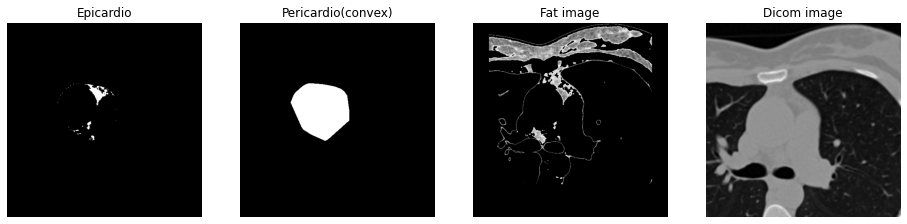

In [ ]:
plt.figure(figsize=(16,16))
plt.subplot(1,4,1)
plt.imshow(mascaras_epi[420],cmap='gray')
plt.axis('off')
plt.title('Epicardio')
plt.subplot(1,4,2)
plt.imshow(mascaras_peri[420],cmap='gray')
plt.axis('off')
plt.title('Pericardio(convex)')
plt.subplot(1,4,3)
plt.imshow(fat_images[420])
plt.axis('off')
plt.title('Fat image')
plt.subplot(1,4,4)
plt.imshow(dicom_images[420],cmap='gray')
plt.axis('off')
plt.title('Dicom image')

Enviar dados de teste no formato (0.png)

In [ ]:
dmov_path="/content/drive/MyDrive/TESE/RioFat/Registration/DICOM"
files=glob.glob(dmov_path+'/*.png')

names=[]
nomes=[]

dicom_patient=[]
epi_patient=[]
peri_patient=[]

dicom_global=[]
epi_global=[]
peri_global=[]

slice_passado=1
n=0
for file in files:
  
  # GUARDAR NOME E SLICE DO PACIENTE
  name=file.split('/')
  name=name[-1]
  name=name.split('_')
  slice_atual=int(name[1])
  
  ind=str(name[0])+str('_')+str(name[1])
  names.append(ind)
  nomes.append(str(name[0]))
  
  ne=0

  if (slice_atual >= slice_passado) and n!=756 and str(name[0])==patient:

    # save the image convex mask
    img =cv2.imread(file,0)

    epi_img_path="/content/drive/MyDrive/TESE/Repo_zhixuhao/Teste/image"
    os.chdir(epi_img_path) 
    img_fat = img_to_array(img)
    save_img(str(ne)+'.png', img_fat)
    print('entrou',slice_atual,slice_passado,str(name[0]),ne)
    ne=ne+1
 
  elif (slice_atual >= slice_passado) and n==756:
     
     #Adicionar ultimo slice de todos
    dicom_patient.append(dicom_images[n])
    epi_patient.append(mascaras_epi[n])
    peri_patient.append(mascaras_peri[n])
    
    # fazer append de todas as imagens do ultimo paciente à matriz global
    dicom_global.append(np.array(dicom_patient))
    epi_global.append(np.array(epi_patient))
    peri_global.append(np.array(peri_patient))
    
    print('final')

  else:

    # Adicionar primeiro slice do novo paciente
    dicom_patient.append(dicom_images[n])
    epi_patient.append(mascaras_epi[n])
    peri_patient.append(mascaras_peri[n])
    
    #print('entrou append',slice_atual,slice_passado)

  slice_passado=slice_atual
  n=n+1 